<a href="https://colab.research.google.com/github/timcsmith/MIS536-Public/blob/master/Notebooks/Class07_dtree_kfold_hyperparam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install dmba 

In [7]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn import preprocessing 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


## Modeling Small Sample (Riding Mower Data)

In [8]:
# load data
mower_df = pd.read_csv('https://raw.githubusercontent.com/timcsmith/MIS536-Public/master/Data/RidingMowers.csv')
# use max_depth to control tree size (None = full tree)

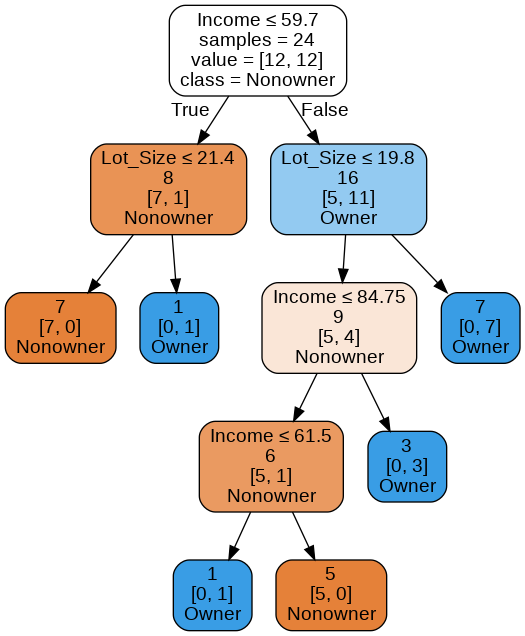

In [9]:
# Full Tree
classTree = DecisionTreeClassifier(random_state=0)
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])
plotDecisionTree(classTree, feature_names=mower_df.columns[:2], class_names=classTree.classes_)

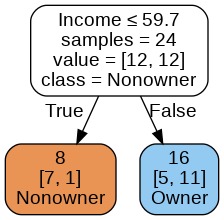

In [10]:
# tree depth = 1
classTree = DecisionTreeClassifier(random_state=0, max_depth=1)
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])
plotDecisionTree(classTree, feature_names=mower_df.columns[:2], class_names=classTree.classes_)

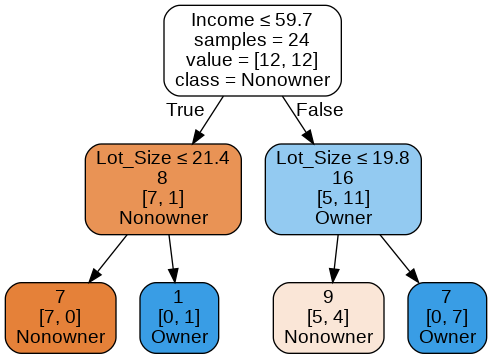

In [11]:
# tree depth = 2
classTree = DecisionTreeClassifier(random_state=0, max_depth=2)
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])
plotDecisionTree(classTree, feature_names=mower_df.columns[:2], class_names=classTree.classes_)

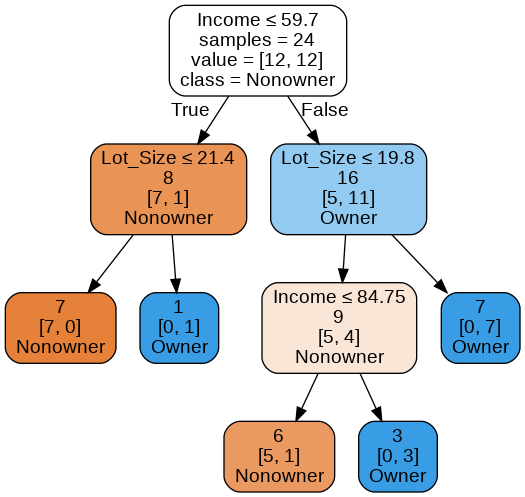

In [12]:
# tree depth = 3
classTree = DecisionTreeClassifier(random_state=0, max_depth=3)
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])
plotDecisionTree(classTree, feature_names=mower_df.columns[:2], class_names=classTree.classes_)

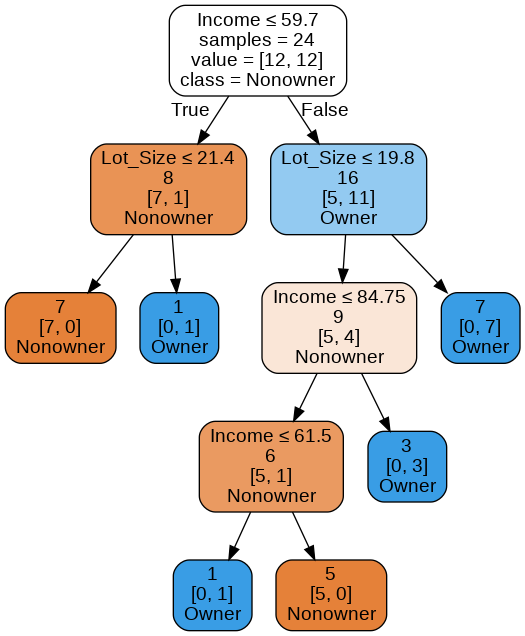

In [13]:
# tree depth = 4
classTree = DecisionTreeClassifier(random_state=0, max_depth=4)
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])
plotDecisionTree(classTree, feature_names=mower_df.columns[:2], class_names=classTree.classes_)

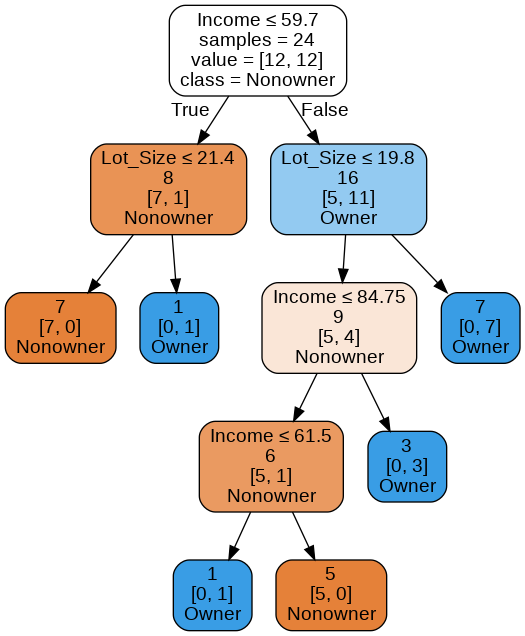

In [14]:
# tree depth = 5
classTree = DecisionTreeClassifier(random_state=0, max_depth=5)
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])
plotDecisionTree(classTree, feature_names=mower_df.columns[:2], class_names=classTree.classes_)

## Larger Data Sets (Universal Bank)

In [15]:
# load data
bank_df = pd.read_csv('https://raw.githubusercontent.com/timcsmith/MIS536-Public/master/Data/UniversalBank.csv')
bank_df.drop(columns=['ID', 'ZIP Code'], inplace=True)


In [16]:
# clean data (we're just going to drop the two non-predictor columns)
X = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']

In [17]:
# 70/30 train test split 
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)



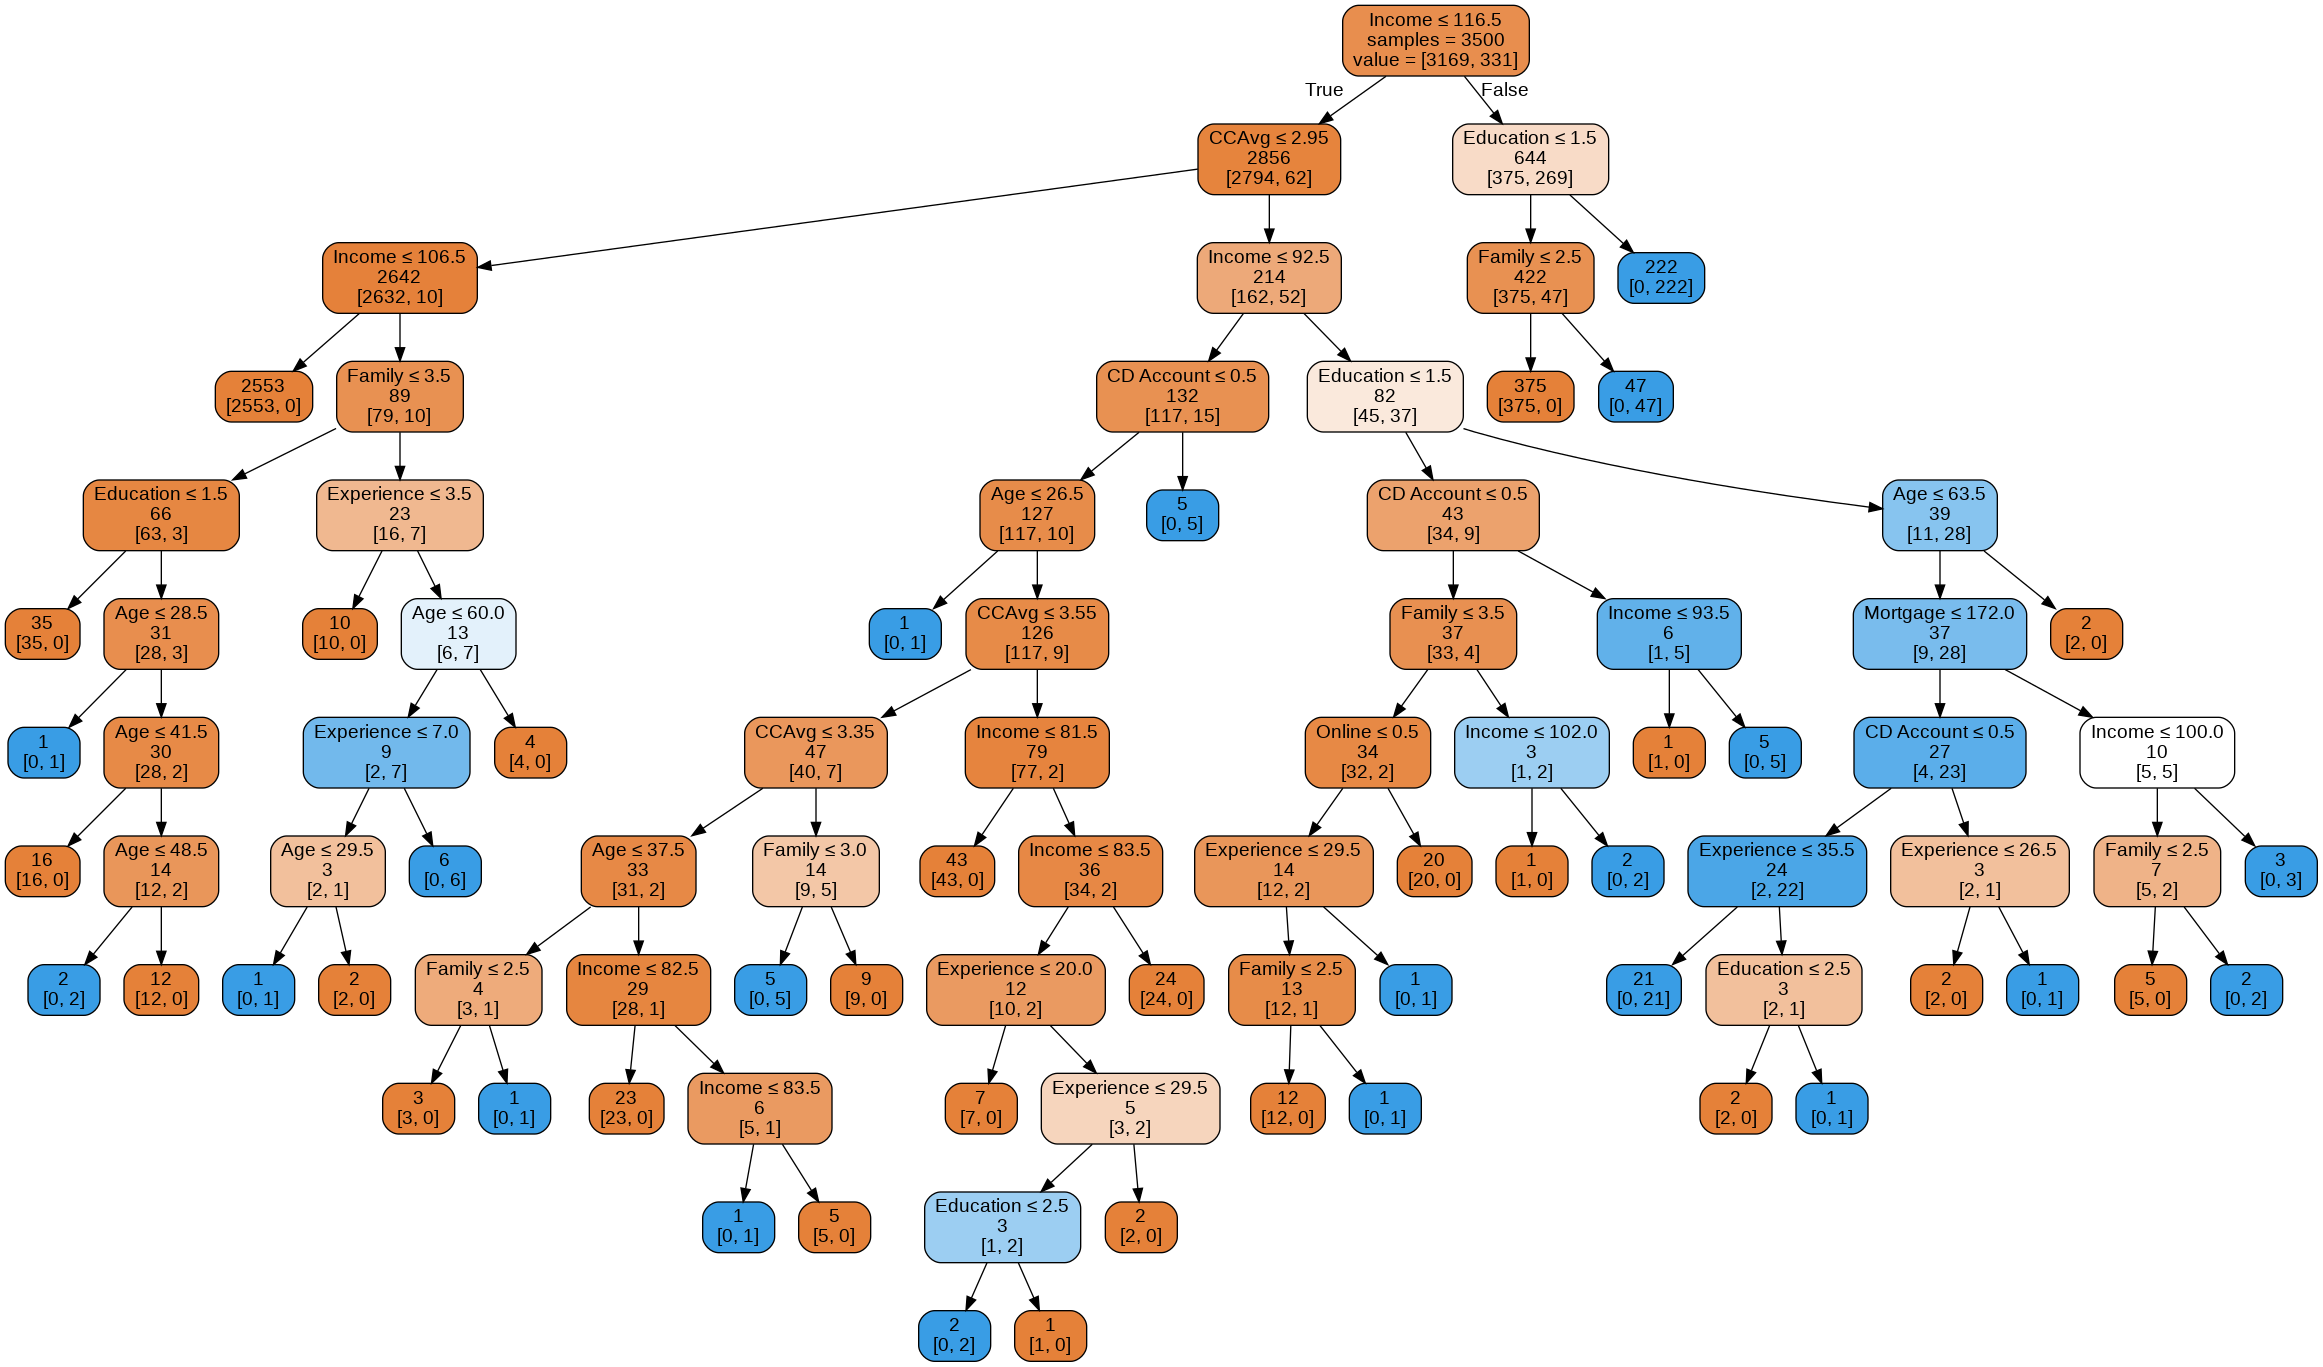

In [18]:
# Create a full, non-pruned, tree
fullClassTree = DecisionTreeClassifier(random_state=1)
fullClassTree.fit(train_X, train_y)

plotDecisionTree(fullClassTree, feature_names=train_X.columns)

In [19]:
# Look at performance some characteristics of this model
classificationSummary(train_y, fullClassTree.predict(train_X))
print('\n*****************\n')
print()
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 3169    0
     1    0  331

*****************


Confusion Matrix (Accuracy 0.9800)

       Prediction
Actual    0    1
     0 1338   13
     1   17  132


## Cross Validation

In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data. The k results can then be averaged to produce a single estimation. 

![cross validation diagram](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)


### Which value of k to use?

The value of 10 for k has been found through experimentation to generally result in a model skill estimate with low bias a modest variance (in more advanced analysis this can be refined, but for our purposes use it as a "rule of thumb"). See Slide in Class01, and Class07.

In [20]:
treeClassifier = DecisionTreeClassifier(random_state=1)
scores = cross_val_score(treeClassifier, train_X, train_y, cv=10)
scores.mean()

0.9860000000000001

In [21]:
precision = cross_val_score(treeClassifier, train_X, train_y, cv=10, scoring='precision')
precision.mean()

0.9363035478120867

In [22]:
precision = cross_val_score(treeClassifier, train_X, train_y, cv=10, scoring='recall')
precision.mean()

0.91524064171123

## Hyperparameter Tuning


In [23]:
score_measure = 'precision'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [1, 5, 10, 20, 30, 40], 
    'min_samples_split': [1, 5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_X, train_y)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestPrecisionTree = gridSearch.best_estimator_


precision score:  0.9865908432338453
parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.001, 'min_samples_split': 80}


In [24]:
score_measure = 'recall'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [1, 5, 10, 20, 30, 40], 
    'min_samples_split': [1, 5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_X, train_y)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestRecallTree = gridSearch.best_estimator_

recall score:  0.9243315508021391
parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.001, 'min_samples_split': 5}


In [25]:
score_measure = 'accuracy'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [1, 5, 10, 20, 30, 40], 
    'min_samples_split': [1, 5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_X, train_y)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestAccuracyTree = gridSearch.best_estimator_

accuracy score:  0.9894285714285715
parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.001, 'min_samples_split': 20}


In [26]:
classificationSummary(valid_y, bestAccuracyTree.predict(valid_X))
print("\n")
classificationSummary(valid_y, bestPrecisionTree.predict(valid_X))
print("\n")
classificationSummary(valid_y, bestRecallTree.predict(valid_X))
print("\n")


Confusion Matrix (Accuracy 0.9813)

       Prediction
Actual    0    1
     0 1341   10
     1   18  131


Confusion Matrix (Accuracy 0.9813)

       Prediction
Actual    0    1
     0 1343    8
     1   20  129


Confusion Matrix (Accuracy 0.9813)

       Prediction
Actual    0    1
     0 1341   10
     1   18  131




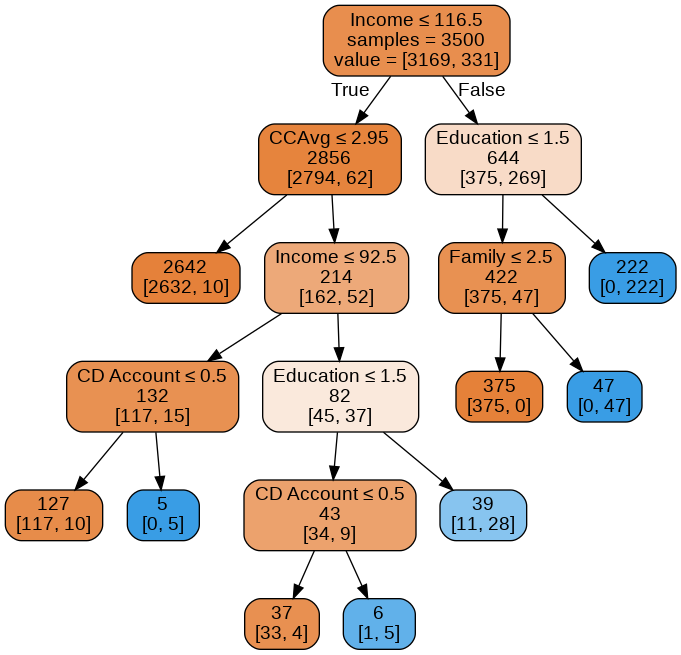

In [27]:
plotDecisionTree(bestAccuracyTree, feature_names=train_X.columns)


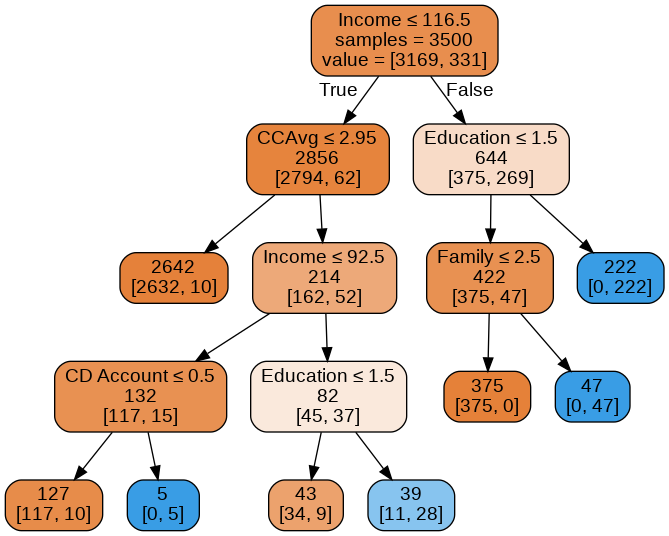

In [28]:
plotDecisionTree(bestPrecisionTree, feature_names=train_X.columns)


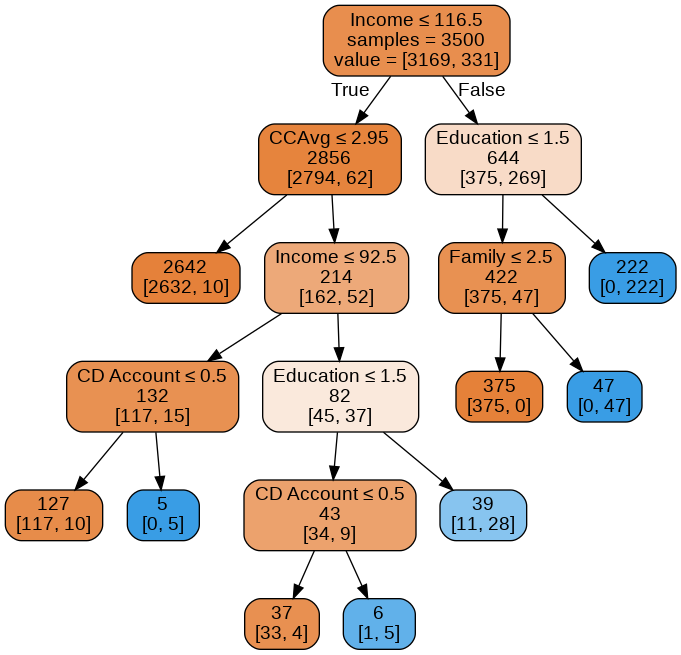

In [29]:
plotDecisionTree(bestRecallTree, feature_names=train_X.columns)

## Hyperparamater Tuning with k-NN

In [30]:
# Load the data direct from GitHub
bank_df = pd.read_csv('https://github.com/timcsmith/MIS536-Public/raw/master/Data/UniversalBank.csv')

bank_df = bank_df.drop(columns=['ID', 'ZIP Code'])

# translation education categories into dummy vars
bank_df['Education'] = bank_df['Education'].astype('category')
bank_df = pd.get_dummies(bank_df, prefix_sep='_', drop_first=False)

# 70/70 train test split
train_df, validation_df = train_test_split(bank_df, test_size=0.4, random_state=1)
print('Training set:', train_df.shape, 'Validation set:', validation_df.shape)

# creat list of that are our predictors (X), and outcome (y)
y = 'Personal Loan'
X = list(bank_df.columns)
X.remove(y)

# create a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()
scaler.fit(train_df[X])

# Transform the predictors of training, validation and newCustomer
train_X= scaler.transform(train_df[X])
train_y = train_df[y]
valid_X = scaler.transform(validation_df[X])
valid_y = validation_df[y]




Training set: (3000, 14) Validation set: (2000, 14)


In [31]:
# check the performance of a few k-NN

# train model k=1
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(train_X, train_y)
print("**** 1-NN model")
print("Accuracy score:", accuracy_score(valid_y, knn1.predict(valid_X)))
print("Precision score:", precision_score(valid_y, knn1.predict(valid_X)))
print("Recall score:", recall_score(valid_y, knn1.predict(valid_X)))


# train model k=3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(train_X, train_y)
print("**** 3-NN model")
print("Accuracy score:", accuracy_score(valid_y, knn3.predict(valid_X)))
print("Precision score:", precision_score(valid_y, knn3.predict(valid_X)))
print("Recall score:", recall_score(valid_y, knn3.predict(valid_X)))

# train model k=5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(train_X, train_y)
accuracy_score(valid_y, knn5.predict(valid_X))
print("**** 5-NN model")
print("Accuracy score:", accuracy_score(valid_y, knn5.predict(valid_X)))
print("Precision score:", precision_score(valid_y, knn5.predict(valid_X)))
print("Recall score:", recall_score(valid_y, knn5.predict(valid_X)))

**** 1-NN model
Accuracy score: 0.9545
Precision score: 0.8493150684931506
Recall score: 0.6424870466321243
**** 3-NN model
Accuracy score: 0.9535
Precision score: 0.9166666666666666
Recall score: 0.5699481865284974
**** 5-NN model
Accuracy score: 0.9565
Precision score: 0.9649122807017544
Recall score: 0.5699481865284974


In [32]:
score_measure = 'accuracy'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'n_neighbors': list(range(1,49,2))
}
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_X, train_y)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestAccuracyKnn = gridSearch.best_estimator_

accuracy score:  0.9646666666666667
parameters:  {'n_neighbors': 3}


In [33]:
score_measure = 'precision'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'n_neighbors': list(range(1,49,2))
}
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_X, train_y)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestPrecisionKnn = gridSearch.best_estimator_

precision score:  0.969584216952638
parameters:  {'n_neighbors': 9}


In [34]:
score_measure = 'recall'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'n_neighbors': list(range(1,49,2))
}
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_X, train_y)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)


bestRecallKnn = gridSearch.best_estimator_

recall score:  0.6764778325123153
parameters:  {'n_neighbors': 1}


How SKLearn handles ties (and why you should choose odd values of k): "Warning: Regarding the Nearest Neighbors algorithms, if it is found that two neighbors, neighbor k+1 and k, have identical distances but but different labels, the results will depend on the ordering of the training data."
